# Machine Learning Assignment 2

#### We imported all the libraries needed...

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## Data Preprocessing:

#### Read the data to start working...
#### Display data..

In [108]:
data = pd.read_csv('Titanic-Dataset.csv')

In [109]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning...
#### We will check the null values.

In [110]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### We will remove unnecessary columns and fill missing values in the 'Age' and 'Embarked' columns.

In [111]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3804\753211190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3804\753211190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

#### Check the null values again, it will be all zeroes.

In [112]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Check the data types of all columns of the dataset.

In [113]:
print(data.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


#### Encoding:
Encode 'Sex' as binary and apply one-hot encoding to 'Embarked' (drop first to prevent multicollinearity), then display first 5 rows.

In [114]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [115]:
print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


#### We will check duplicated values.

In [116]:
print(data.duplicated().sum())

111


#### We dropped the duplicated values.

In [117]:
data.drop_duplicates(inplace=True)

#### Check the duplicated values again, it will be all zeroes.

In [118]:
print(data.duplicated().sum())

0


#### We used box plots to visualize outliers in the 'Age' and 'Fare' columns.

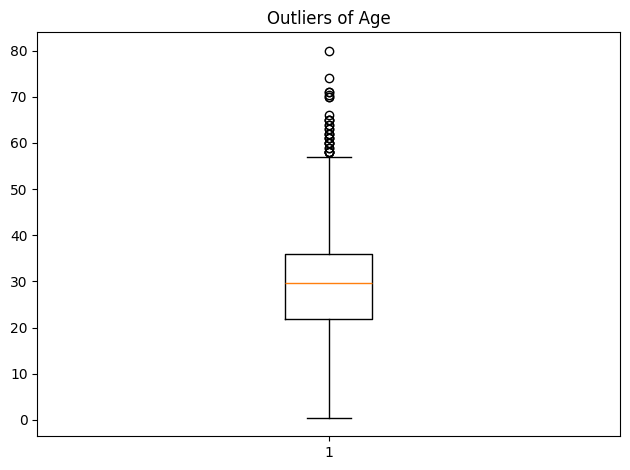

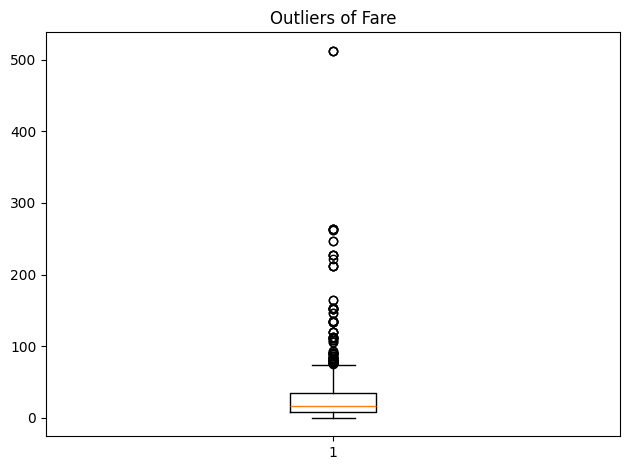

In [119]:
# Box plot to check outliers in Age
plt.boxplot(x=data['Age'])
plt.title("Outliers of Age")
plt.tight_layout()
plt.show()
# Box plot to check outliers in Fare
plt.boxplot(x=data['Fare'])
plt.title("Outliers of Fare")
plt.tight_layout()
plt.show()

#### We removed outliers from the 'Age' and 'Fare' columns using the Interquartile Range (IQR) method.

In [120]:
# For 'Age'
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_Age = Q1_Age - 1.5 * IQR_Age
upper_Age = Q3_Age + 1.5 * IQR_Age

# For 'Fare'
Q1_Fare = data['Fare'].quantile(0.25)
Q3_Fare = data['Fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare
lower_Fare = Q1_Fare - 0.5 * IQR_Fare
upper_Fare = Q3_Fare + 0.5 * IQR_Fare

# Remove outliers in both columns
data = data[
    (data['Age'] >= lower_Age) & (data['Age'] <= upper_Age) &
    (data['Fare'] >= lower_Fare) & (data['Fare'] <= upper_Fare)
]

#### Finally, We created a boxplot of 'Age' and 'Fare' after outlier removal to see their distributions without extreme values.

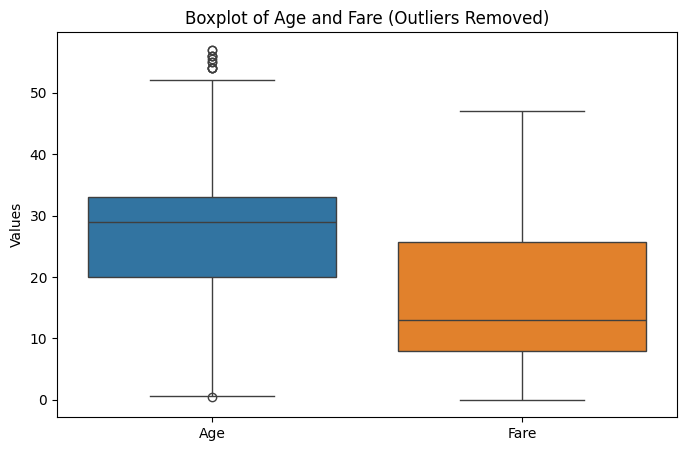

In [121]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare (Outliers Removed)")
plt.ylabel("Values")
plt.show()

#### This is the final discription and info of the data

In [122]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.348259,2.548922,0.338308,27.356257,0.490879,0.404643,16.164179
std,0.476814,0.668845,0.473527,11.857130,0.973656,0.858093,10.088477
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,1.000000,33.000000,1.000000,0.000000,25.756250
max,1.000000,3.000000,1.000000,57.000000,5.000000,6.000000,47.100000


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    603 non-null    int64  
 1   Pclass      603 non-null    int64  
 2   Sex         603 non-null    int64  
 3   Age         603 non-null    float64
 4   SibSp       603 non-null    int64  
 5   Parch       603 non-null    int64  
 6   Fare        603 non-null    float64
 7   Embarked_Q  603 non-null    bool   
 8   Embarked_S  603 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 38.9 KB


## Train/Validation/Test Splitting:
We will separate the features (X) from the target variable (y), with 'Survived' as the target and all other columns as features.

In [124]:
X = data.loc[:, data.columns != 'Survived']
y= data['Survived']

#### Split the dataset into training, validation, and test sets:
- 20% of the data is reserved for testing.
- The remaining 80% is further split: 25% for validation and 75% for training.


In [125]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 25% of 80% = 20%

#### Standardize training, validation, and test sets separately to avoid data leakage.

In [126]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_val)
X_val_s= scaler.transform(X_val)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

## KNN Implementation:

#### First, loop through k values to find the one with the highest validation accuracy for KNN.

In [127]:
k_values = range(1, 31)
validation_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    y_val_pred = knn.predict(X_val_s)
    acc = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(acc)

print("Validation Accuracies: ", validation_accuracies)

# Best K
best_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print("Best K is: ", best_k)

Validation Accuracies:  [0.6859504132231405, 0.71900826446281, 0.7107438016528925, 0.7768595041322314, 0.7355371900826446, 0.7520661157024794, 0.7603305785123967, 0.7851239669421488, 0.7603305785123967, 0.7768595041322314, 0.7520661157024794, 0.7768595041322314, 0.7520661157024794, 0.7768595041322314, 0.7603305785123967, 0.7603305785123967, 0.768595041322314, 0.768595041322314, 0.768595041322314, 0.7768595041322314, 0.7603305785123967, 0.7768595041322314, 0.7768595041322314, 0.7768595041322314, 0.7768595041322314, 0.7768595041322314, 0.7603305785123967, 0.7603305785123967, 0.7768595041322314, 0.7851239669421488]
Best K is:  8


#### Then, train the final KNN model using the best k on the training set.

In [128]:
# Model with best_k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=8)

#### Finally, predict on the test set and calculate the final test accuracy.

In [129]:
y_test_pred = final_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.6033057851239669


C:\Users\Dell\PycharmProjects\pythonProject6\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## Cross-Validation:


#### First, perform 5-fold stratified cross-validation to evaluate model stability and average performance.
#### Then, predict the labels of the standardized test set using the final KNN model.

In [130]:
#Cross-Validation with Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_knn, X_train_s, y_train, cv=skf)
print("Stratified Cross-Validation Scores:", cv_scores)
print("Average Stratified Cross-Validation Score:", np.mean(cv_scores))

Stratified Cross-Validation Scores: [0.79452055 0.80555556 0.70833333 0.80555556 0.80555556]
Average Stratified Cross-Validation Score: 0.783904109589041


In [142]:
y_pred = final_knn.predict(X_test_s)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

## Confusion Matrix Computation:

#### Generate and display the confusion matrix to assess the model's classification performance on the test set.

In [143]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[64  9]
 [15 33]]


#### And this is the visulization of the confusion matrix using 'heatmap'.

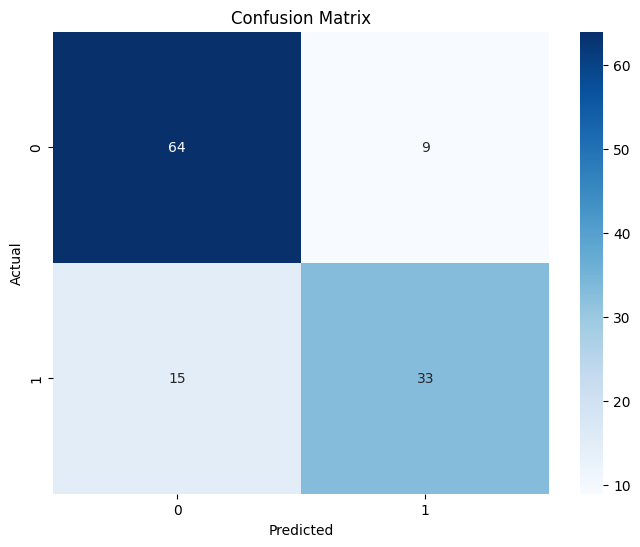

In [144]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### This is the accuracies using cross-validation vs. validation set vs. test set results...

In [134]:
train_accuracy = final_knn.score(X_train_s, y_train)
validation_accuracy = final_knn.score(X_val_s, y_val)
test_accuracy = final_knn.score(X_test_s, y_test)

print("\nPerformance Summary:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Performance Summary:
Training Accuracy: 0.8116
Validation Accuracy: 0.7851
Test Accuracy: 0.8017
Cross-Validation Accuracy: 0.7839


#### And this is the classification report, including precision, recall, and F1-score for the test set.

In [135]:
#Classification Report (includes Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        73
           1       0.79      0.69      0.73        48

    accuracy                           0.80       121
   macro avg       0.80      0.78      0.79       121
weighted avg       0.80      0.80      0.80       121



##  Overfitting and Model Improvement:
#### We performed KNN hyperparameter tuning with cross-validation to find the best k and then plotted accuracy for each k value.

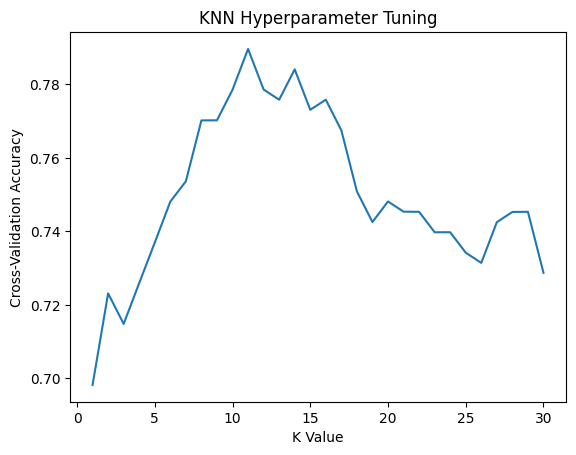

Best K: 11


In [136]:
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_s, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot
plt.plot(k_values, cv_scores)
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

# Best K
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Best K: {best_k}")

#### And reduced the feature dimensions using PCA to retain 95% variance. We compared the number of features before and after transformation.

In [137]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)
print(f"Original number of features: {X_train_s.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

Original number of features: 8
Reduced number of features after PCA: 7


#### Then, tune K for KNN using cross-validation after applying PCA, and plot the relationship between K and accuracy.

Best K (after PCA): 11
Best Cross-Validation Accuracy (after PCA): 0.7896


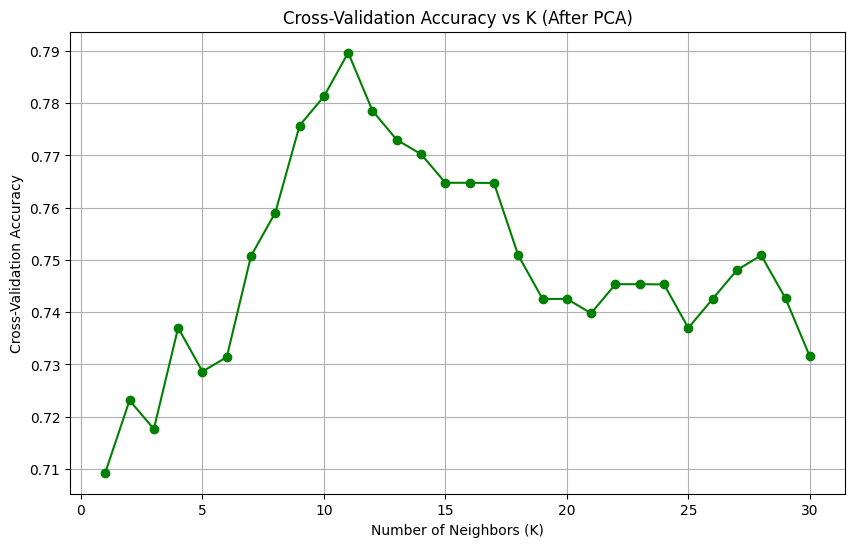

In [138]:
#Cross-Validation to Tune K (After PCA)
cv_scores_pca = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
    cv_scores_pca.append(scores.mean())

best_k_pca = k_values[np.argmax(cv_scores_pca)]
best_score_pca = max(cv_scores_pca)

print(f"Best K (after PCA): {best_k_pca}")
print(f"Best Cross-Validation Accuracy (after PCA): {best_score_pca:.4f}")

# Plot K vs Cross-Validation Accuracy (After PCA)
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_pca, marker='o', color='green')
plt.title('Cross-Validation Accuracy vs K (After PCA)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

#### Finally, this is the KNN model using the best K after PCA, make predictions, and print the classification report.

In [139]:
#Retrain Final KNN Model (After PCA)
final_knn_pca = KNeighborsClassifier(n_neighbors=best_k_pca)
final_knn_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = final_knn_pca.predict(X_test_pca)

report = classification_report(y_test, y_pred_pca)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        73
           1       0.82      0.67      0.74        48

    accuracy                           0.81       121
   macro avg       0.81      0.79      0.79       121
weighted avg       0.81      0.81      0.81       121



## Visualizations:

#### This is a scatter plot of Age vs Fare, colored by survival status to visualize the relationship between age, fare, and survival.

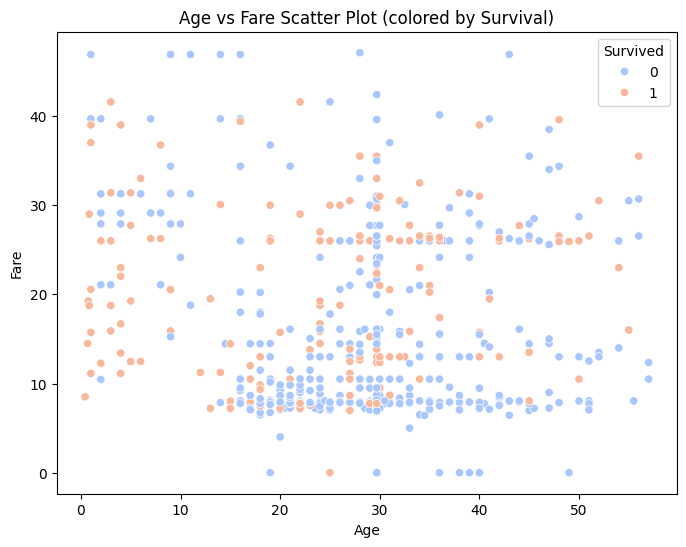

In [140]:
#Scatter plot

data['Survived_Label'] = data['Survived'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare Scatter Plot (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

#### And this is a 3D scatter plot to visualize survival status based on principal components.

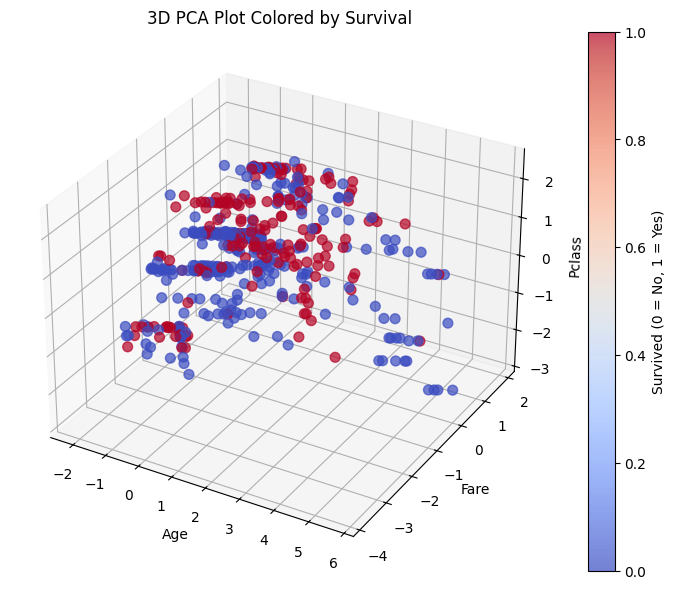

In [141]:
#Prepare the data (drop target and non-numeric columns if any)
X = data.drop(columns=['Survived'])
X = X.select_dtypes(include=[float, int]).dropna(axis=1)  # keep only valid numeric columns

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

#Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#Plot the PCA components, colored by survival
sc = ax.scatter(
    X_pca[:, 0],     # PC1
    X_pca[:, 1],     # PC2
    X_pca[:, 2],     # PC3
    c=data['Survived'],
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

#Label and show plot
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
ax.set_title('3D PCA Plot Colored by Survival')
plt.colorbar(sc, label='Survived (0 = No, 1 = Yes)')
plt.show()
